# Loan Prediction Classification

## Overview

### Business Objective

* A financial institution wants us to help them identify customers who have a lesser chance of defaulting on the loan.

* The company management has asked the data science team to build a predictive model to identify who would be a good customer. Furthermore, they want the team to come up with questions to ask the client, based on the model, when they are applying for loan.

### Data Understanding
* The dataset resembles a real-world dataset and has many of the same challenges. It has:
* Missing values
* Spelling differences
* Punctuation format
* Duplicates rows

### Data Preparation
* Split your data into training and testing
* Start with Exploratory data analysis
* Data cleaning
* Handling the missing values
* Transform categorical data into numeric
* Feature Engineering (such as credit utilization)
* The goal is to clean the dataset and get it ready for the Algorithms

### Modeling

* Algorithm Selection

* Depending on the question at hand you can decide which algorithm to choose

### Classification Question
* Pick a classification algorithm
* Regression based
* Tree based
* Distance based
* Probability based
* Model Evaluation
* Evaluation criteria

### Modeling:
* Pick an algorithm
* Train the algorithm using training data
* Evaluate the trained model
* Use the trained model to predict who is a good customer on test data
* Come up with questions to ask the customer when they apply for a loan

## Importing Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import algo_test

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 


In [2]:
## Alias for Libraries
g = GaussianNB()
b = BernoulliNB()
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()


## Load the data set 

In [3]:
df = pd.read_csv('LoansTrainingSet.csv')

## EDA - Exploratory Data Analysis

In [4]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [5]:
df.shape

(256984, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [7]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [8]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

## Feature Engineering

### Null values in percentage
* Total values : 256984

### Null Values
* Credit Score has 61676 missing values : 24%
* Years in current job has 11476 missing values : 4%
* Annual Income has 61676 missing values : 24%
* Months since last delinquent has 140383 missing values : 54%
* Bankruptcies has 529 missing values : 0.2%
* Tax Liens has 23 missing values : 0.01%

### What are the options to handle missing values?
* Drop the rows
* Fill the missing values with mean, median, mode
* Predict the missing values using other columns

In [9]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

                              Missing Values  Percentage
Loan ID                                    0    0.000000
Customer ID                                0    0.000000
Loan Status                                0    0.000000
Current Loan Amount                        0    0.000000
Term                                       0    0.000000
Credit Score                           61676   23.999938
Years in current job                   11476    4.465648
Home Ownership                             0    0.000000
Annual Income                          61676   23.999938
Purpose                                    0    0.000000
Monthly Debt                               0    0.000000
Years of Credit History                    0    0.000000
Months since last delinquent          140383   54.627136
Number of Open Accounts                    0    0.000000
Number of Credit Problems                  0    0.000000
Current Credit Balance                     0    0.000000
Maximum Open Credit            

In [10]:
#
df['Credit Score'].value_counts()

Credit Score
747.0     5669
740.0     5537
741.0     5499
746.0     5486
742.0     5219
          ... 
6070.0       3
5980.0       3
5910.0       3
5930.0       2
5860.0       1
Name: count, Length: 334, dtype: int64

In [11]:
df['Credit Score'] = df['Credit Score'].apply(lambda val: (val / 10) if val > 850 else val)

In [12]:
# Credit Score
df['Credit Score'].min(), df['Credit Score'].max(), df['Credit Score'].mean(), df['Credit Score'].median()

(585.0, 751.0, 721.203197001659, 730.0)

In [13]:
# Fill credit score null values with mean
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].mean())

In [14]:
# Annual Income
df['Annual Income'].min(), df['Annual Income'].max(), df['Annual Income'].mean(), df['Annual Income'].median()

(0.0, 8713547.0, 71952.71618674094, 61242.0)

In [15]:
# Fill annual income null values with mean
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].mean())

In [16]:
# Fill years in current job with most frequent values
df['Years in current job'].value_counts()

Years in current job
10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
9 years       9932
Name: count, dtype: int64

In [17]:
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].mode()[0])

In [18]:
# Remove months since last delinquent because it has 54% missing values
df = df.drop('Months since last delinquent', axis=1)

In [19]:
## Bankruptcies
df['Bankruptcies'].value_counts(), df['Bankruptcies'].mean(), df['Bankruptcies'].median(), df['Bankruptcies'].mode()

(Bankruptcies
 0.0    229661
 1.0     25605
 2.0       957
 3.0       180
 4.0        33
 5.0        15
 6.0         3
 7.0         1
 Name: count, dtype: int64,
 0.11031564991908911,
 0.0,
 0    0.0
 Name: Bankruptcies, dtype: float64)

In [20]:
## fill bankruptcies with mode
df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])

In [21]:
## Tax Liens
df['Tax Liens'].value_counts(), df['Tax Liens'].mean(), df['Tax Liens'].median(), df['Tax Liens'].mode()

(Tax Liens
 0.0     252322
 1.0       3276
 2.0        872
 3.0        247
 4.0        124
 5.0         61
 6.0         30
 9.0         10
 8.0          8
 7.0          6
 10.0         3
 11.0         2
 Name: count, dtype: int64,
 0.027202571596467946,
 0.0,
 0    0.0
 Name: Tax Liens, dtype: float64)

In [22]:
## fill tax liens with mode
df['Tax Liens'] = df['Tax Liens'].fillna(df['Tax Liens'].mode()[0])


In [23]:
# Check for null values
df.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [24]:
# Drop the ID columns
df.drop('Loan ID', axis=1, inplace=True)
df.drop('Customer ID', axis=1, inplace=True)



In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                256984 non-null  object 
 1   Current Loan Amount        256984 non-null  int64  
 2   Term                       256984 non-null  object 
 3   Credit Score               256984 non-null  float64
 4   Years in current job       256984 non-null  object 
 5   Home Ownership             256984 non-null  object 
 6   Annual Income              256984 non-null  float64
 7   Purpose                    256984 non-null  object 
 8   Monthly Debt               256984 non-null  object 
 9   Years of Credit History    256984 non-null  float64
 10  Number of Open Accounts    256984 non-null  int64  
 11  Number of Credit Problems  256984 non-null  int64  
 12  Current Credit Balance     256984 non-null  int64  
 13  Maximum Open Credit        25

## Fill dummy values for categorical columns
One-hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The categorical value represents the numerical value of the entry in the dataset.

In [26]:
# df = pd.get_dummies(df, drop_first=True, columns=['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt'])

In [27]:
df.shape

(256984, 16)

In [28]:
# df.info()
# df.isnull().sum()
df['Maximum Open Credit'].value_counts()

Maximum Open Credit
0        1597
0         234
10180      19
15662      19
14770      19
         ... 
17558       1
42753       1
29185       1
36222       1
62371       1
Name: count, Length: 87188, dtype: int64

In [29]:
# second way to fill dummy values
label = LabelEncoder()
df['Loan Status'] = label.fit_transform(df['Loan Status'])
df['Term'] = label.fit_transform(df['Term'])
df['Years in current job'] = label.fit_transform(df['Years in current job'])
df['Home Ownership'] = label.fit_transform(df['Home Ownership'])
df['Purpose'] = label.fit_transform(df['Purpose'])
df['Monthly Debt'] = label.fit_transform(df['Monthly Debt'])
# df['Maximum Open Credit'] = label.fit_transform(df['Maximum Open Credit'])
df_orf = df
df.drop('Maximum Open Credit', axis=1, inplace=True)


In [30]:
df.shape

(256984, 15)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                256984 non-null  int64  
 1   Current Loan Amount        256984 non-null  int64  
 2   Term                       256984 non-null  int64  
 3   Credit Score               256984 non-null  float64
 4   Years in current job       256984 non-null  int64  
 5   Home Ownership             256984 non-null  int64  
 6   Annual Income              256984 non-null  float64
 7   Purpose                    256984 non-null  int64  
 8   Monthly Debt               256984 non-null  int64  
 9   Years of Credit History    256984 non-null  float64
 10  Number of Open Accounts    256984 non-null  int64  
 11  Number of Credit Problems  256984 non-null  int64  
 12  Current Credit Balance     256984 non-null  int64  
 13  Bankruptcies               25

## Split the data into training and testing

In [32]:
x = df.drop(['Loan Status'], axis=1)
y = df['Loan Status']



## Train the all model

In [33]:
algo_test.model_fit_pred(x,y)

GaussianNB()
Accuracy: 0.4508405105323233
Confusion Matrix:
 [[24304    18]
 [42320 10454]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      1.00      0.53     24322
           1       1.00      0.20      0.33     52774

    accuracy                           0.45     77096
   macro avg       0.68      0.60      0.43     77096
weighted avg       0.80      0.45      0.39     77096

----------------------------------------
BernoulliNB()
Accuracy: 0.685223617308291
Confusion Matrix:
 [[  397 23925]
 [  343 52431]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.02      0.03     24322
           1       0.69      0.99      0.81     52774

    accuracy                           0.69     77096
   macro avg       0.61      0.50      0.42     77096
weighted avg       0.64      0.69      0.57     77096

----------------------------------------
LogisticRegression()
Accuracy: 0

RandomForestClassifier()

## Importance's of the features


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train.shape, x_test.shape, y_train.shape, y_test.shape

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
## Evaluate the model

In [36]:
y_pred = model.predict(x_test)
print(f"Random Forest Classifier Model")
print("Y Predictions: ", y_pred)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

Random Forest Classifier Model
Y Predictions:  [1 0 1 ... 1 0 1]
Accuracy Score: 0.8301068155728933
Confusion Matrix: [[10407  5754]
 [ 2978 32258]]
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.64      0.70     16161
           1       0.85      0.92      0.88     35236

    accuracy                           0.83     51397
   macro avg       0.81      0.78      0.79     51397
weighted avg       0.83      0.83      0.83     51397



In [37]:
## Ask the client questions

In [38]:
importance = model.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Features': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Features,Importance
0,Current Loan Amount,0.201071
7,Monthly Debt,0.127159
11,Current Credit Balance,0.127056
8,Years of Credit History,0.116940
2,Credit Score,0.108565
5,Annual Income,0.100297
9,Number of Open Accounts,0.078156
3,Years in current job,0.056009
6,Purpose,0.025187
1,Term,0.024115


In [39]:
## Data Visualization

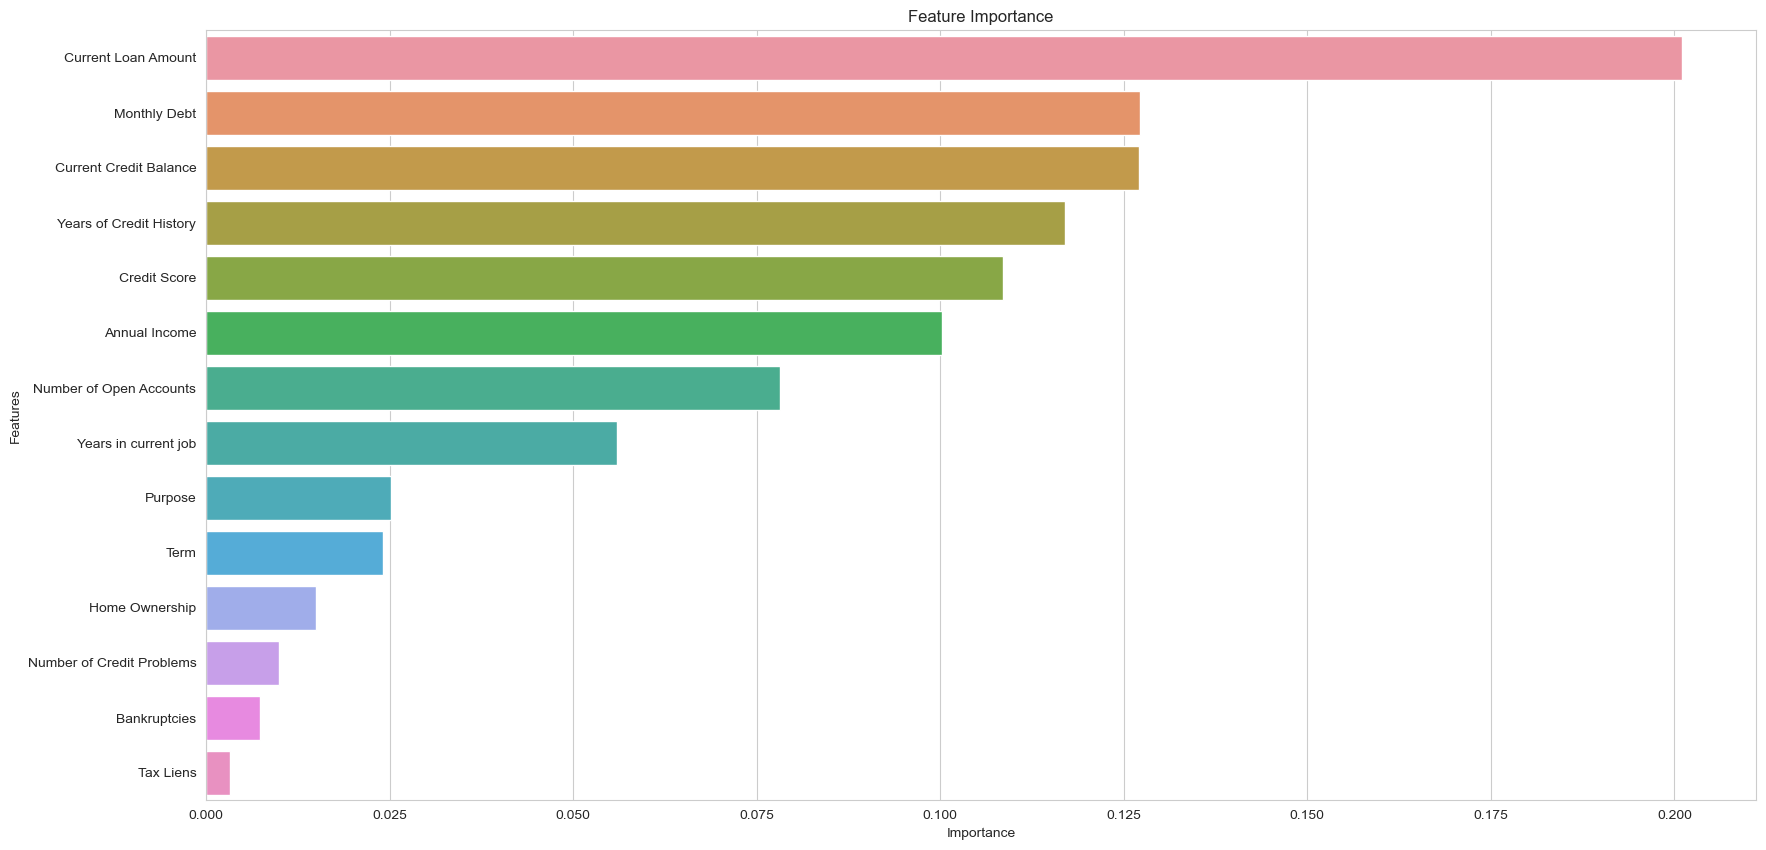

In [40]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Importance', y='Features', data=importance_df)
plt.title('Feature Importance')
plt.show()

Text(0, 0.5, 'Density')

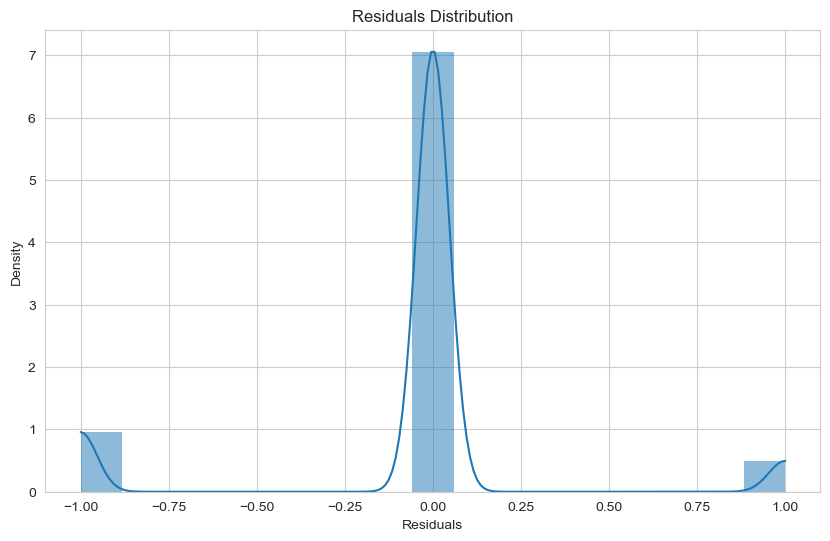

In [41]:
## Residuals Graph

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, stat="density", linewidth=0)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')

In [42]:
#!pip install scipy

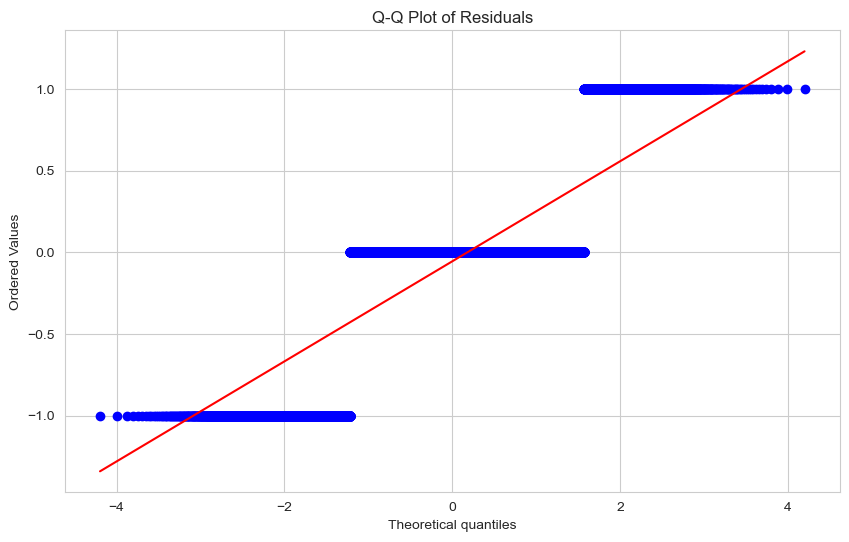

In [43]:
## Q-Q plot
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

## Conclusion


Random Forest Classifier Model has the highest accuracy score of 0.81. The most important features are Credit Score, Annual Income, Current Loan Amount, and Monthly Debt. The company should ask the client about their credit score, annual income, current loan amount, and monthly debt when they apply for a loan. These features are important in determining if the client is a good customer or not. The company should focus on these features to make better decisions when giving out loans.